# Supplementary Figures - Mississippi River Tank Data [Time Series]

## Getting setup

Python and NTU conversion equation loads

In [1]:
from math import nan
import numpy as np
import os as os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib widget
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display
import datetime

# Set plot parameters -----------------------

plt.rcParams.update({'font.size': 8})
# ------ Half Page Width --------------------
wHP = 3.
hHP = 2.33
# ------ Full Page Width --------------------
wFP = 6
hFP = 3

gcolor = 'C3'
scolor = 'C0'
d50color = 'C0'
d84color = 'C8'
ccolor = 'C1'

# Get the working directory and a list of folders that contain data by experiment

working = os.getcwd()
datadir = sorted(glob(working+"/Data_04_Supplementary/*/"))
for i in range(0,len(datadir)):
    print('Data directory:',datadir[i],'(index:',i,')')

Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Data_04_Supplementary/Sup1_DI_VMC-mud_35HZ/ (index: 0 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Data_04_Supplementary/Sup2_DuckPond_VMC-mud_35HZ/ (index: 1 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Data_04_Supplementary/Sup3_DI_VMC-mud_35HZ/ (index: 2 )
Data directory: /Users/strom-adm/My Drive/Frontiers Paper/Data_04_Supplementary/Sup4_DI_VMC-mud_70HZ/ (index: 3 )


## Sample time series

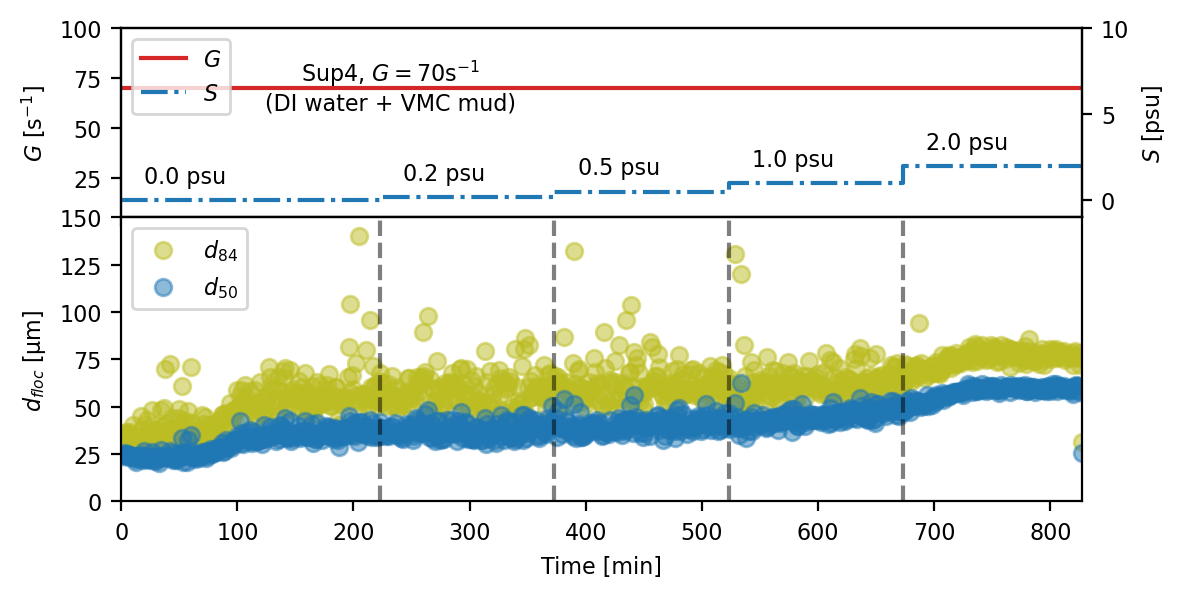

In [2]:
j = 3 # grab data  ------------------------------------

# grab the folder name

expname = os.path.basename(os.path.dirname(datadir[j]))
expinfo = expname.split('_') # break the folder down to get the exp num (i=0), date (i=1), and tank info (i=2)

# set the path to the .csv files

sizedata = datadir[j] + '/size_aligned.csv'
GSdata = datadir[j] + '/G_S_data.csv'
wmdata = datadir[j] + '/water_mud_G.csv'
# OBSdata = datadir[j] + '/obs_aligned.csv'

# read in the data

size = pd.read_csv(sizedata)
GS = pd.read_csv(GSdata)
# obs = pd.read_csv(OBSdata)
wm = pd.read_csv(wmdata,header=None)

watermud ='('+wm.iloc[0,1]+' water + '+wm.iloc[1,1]+' mud)'
Gvalue = '$G = $'+wm.iloc[2,1]+'$\mathrm{s^{-1}}$'

# build the labels table for placing "break" marks and labels on figures

labels = GS[0:-1:2].copy()
labels.reset_index(inplace = True,drop = True)

# make the figure

# set the plot parameter ranges and colors

Gmin = 5
Gmax = 100
    
Smin = -1
Smax = 10

dmin = 0
dmax = 300

if j >=2:
    dmax = 150


xmin = 0
xmax = GS['min'].iloc[-1]
# xmax = 375

fig = plt.figure(figsize=(wFP,hFP))

gs = fig.add_gridspec(2,hspace=0, height_ratios=[2,3])
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(GS['min'], GS['G_Hz'], color=gcolor, alpha=1, label='$G$')
axs[0].set_ylabel('$G$ [$\mathrm{s^{-1}}$]')

axs_twin1 = axs[0].twinx()
axs_twin1.plot(GS['min'], GS['S_ppt'], linestyle = '-.',color=scolor, alpha=1, label='$S$')
axs_twin1.set_ylabel('$S$ [psu]')
axs_twin1.set_ylim(Smin,Smax)

axs[0].set_xlim(xmin,xmax)
axs[0].set_ylim(Gmin,Gmax)

for i in range(0,len(labels['S_ppt'])):         
    axs_twin1.text(labels['min'][i]+20,labels['S_ppt'][i]+1, str(labels['S_ppt'][i])+' psu', # backgroundcolor='white', 
            clip_on='True', multialignment='center', alpha=1) #weight = 'bold'

ytext = 65
if j == 3:
    ytext = 59
axs[0].text(0.15*xmax,ytext, expinfo[0]+', '+Gvalue+'\n'+watermud, # backgroundcolor='white', 
        clip_on='True', multialignment='center', alpha=1) #weight = 'bold'

li1,la1 = axs[0].get_legend_handles_labels()
li2,la2 = axs_twin1.get_legend_handles_labels()

axs[0].legend(li1+li2,la1+la2,loc=2)

if 'd84_mu' in size.columns:
    axs[1].plot(size['min'], size['d84_mu'],'o', color=d84color, alpha=0.5,label='$d_{84}$')
axs[1].plot(size['min'], size['d50_mu'],'o', color=d50color, alpha=0.5,label='$d_{50}$')
axs[1].set_ylabel('$d_{\mathit{floc}}$ [µm]')
axs[1].set_xlabel('Time [min]')
axs[1].set_ylim(dmin,dmax)
axs[1].set_xlim(xmin,xmax)
for i in range(1,len(labels)):
    axs[1].axvline(x=labels['min'][i],color='k', linestyle='--', alpha=0.5)

li3,la3 = axs[1].get_legend_handles_labels()

axs[1].legend(li3,la3,loc=2)
    
fig.tight_layout();
plt.savefig(datadir[j]+'Summary_timeseries_plot_'+expinfo[0]+'.pdf',bbox_inches="tight", pad_inches=0.005) # comment out if you don't want to save it